<a href="https://colab.research.google.com/github/KCY132/HW/blob/main/hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1-1


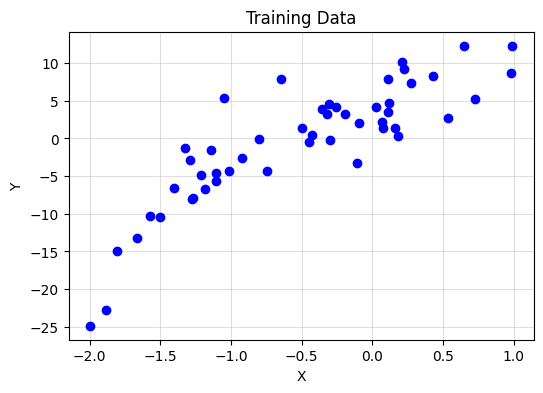

parameter w:
 [3.94188011 8.73592461]


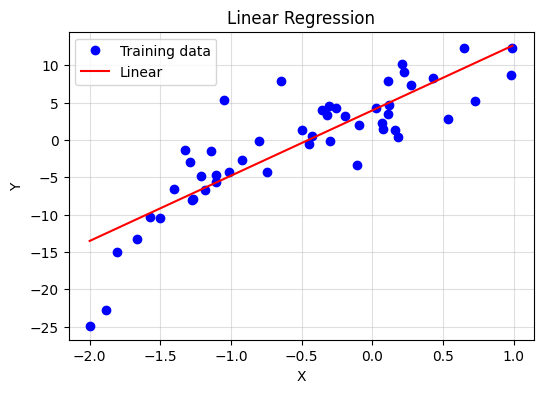

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/data0405.csv")
x = df['x'].values.reshape(-1, 1)
y = df['y'].values

plt.figure(figsize = (6, 4))
plt.plot(x, y, 'bo')
plt.title('Training Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(alpha=0.4)
plt.show()

A = np.hstack([np.ones_like(x), x])

w = np.linalg.inv(A.T @ A) @ A.T @ y
print('parameter w:\n', w)

plt.figure(figsize=(6, 4))
plt.plot(x, y, 'bo', label="Training data")

xp = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
Ap = np.hstack([np.ones_like(xp), xp])
yp = Ap @ w

plt.plot(xp, yp, 'r-', label="Linear")
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(alpha=0.4)
plt.show()

#1-2



Degree 2 model parameters:
 [ 5.03906362  5.27924916 -3.31676315]


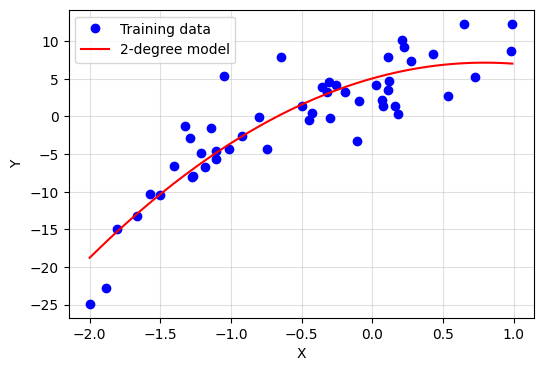


Degree 10 model parameters:
 [  2.70561069   8.7466361   24.11081469  -7.17740071 -70.59489961
 -20.12073822  59.53548381  36.49128236  -8.88620274 -11.06845324
  -2.15841396]


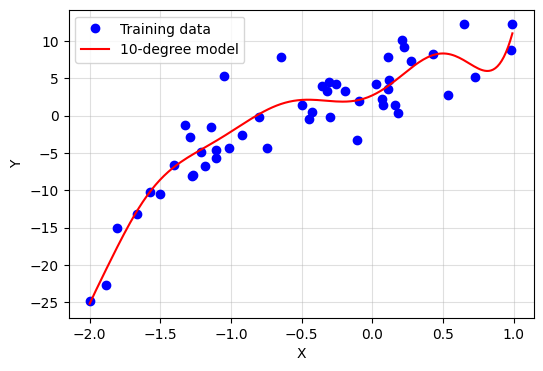

In [ ]:
def make_polynomial_features(x, degree):
    return np.hstack([x**i for i in range(degree + 1)])

# 2차와 10차 회귀
for degree in [2, 10]:
    A = make_polynomial_features(x, degree)
    w = np.linalg.inv(A.T @ A) @ A.T @ y
    print(f'\nDegree {degree} model parameters:\n', w)

    # 예측용 x값
    xp = np.linspace(x.min(), x.max(), 200).reshape(-1, 1)
    Ap = make_polynomial_features(xp, degree)
    yp = Ap @ w

    # 시각화
    plt.figure(figsize=(6, 4))
    plt.plot(x, y, 'bo', label="Training data")
    plt.plot(xp, yp, 'r-', label=f"{degree}-degree model")
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(alpha=0.4)
    plt.show()

# 2


2-2 (2차) 파라미터: [ 0.46137619  1.71642697 -2.02921761]


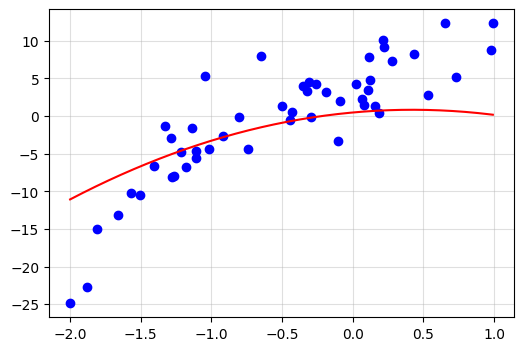

2-2 (4차) 파라미터: [ 0.96730967  0.61615766 -0.09587643  0.9784752  -1.04970844]


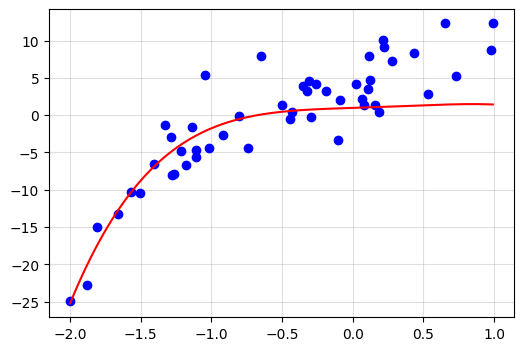

In [ ]:
x = df['x'].values.reshape(-1, 1)
y = df['y'].values.reshape(-1, 1)

# 다항 특성 생성 함수
def make_polynomial_features(x, degree):
    return np.hstack([x**i for i in range(degree + 1)])

# 경사하강법 함수
def gradient_descent(X, y, learning_rate=0.001, epochs=500):
    m, n = X.shape
    w = np.zeros((n, 1))
    for epoch in range(epochs):
        y_pred = X @ w
        error = y_pred - y
        grad = (1/m) * (X.T @ error)
        w -= learning_rate * grad
    return w

# 2차와 4차 모델 학습 및 시각화
for degree in [2, 4]:
    X = make_polynomial_features(x, degree)
    w = gradient_descent(X, y, learning_rate=0.001, epochs=500)

    print(f"2-2 ({degree}차) 파라미터:", w.flatten())

    x_pred = np.linspace(x.min(), x.max(), 200).reshape(-1, 1)
    X_pred = make_polynomial_features(x_pred, degree)
    y_pred = X_pred @ w

    plt.figure(figsize=(6, 4))
    plt.plot(x, y, 'bo')           # 파란 점: 원본 데이터
    plt.plot(x_pred, y_pred, 'r-') # 빨간 선: 예측 결과
    plt.grid(alpha=0.4)
    plt.show()

#3

In [ ]:
# 최소 제곱법은 이론상 수학적으로 정확한 해이고, 경사하강법은 수렴하면 거의 동일한 해가 나온다. 하지만 경사하강법의 해는
# 학습률, 반복횟수에 따라 오차가 발생할 가능성이 있어서 잘 조절하는 것이 중요하다.